## Imports

In [1]:
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

# Integer encoding
from sklearn.preprocessing import OneHotEncoder

# Imputing for missing values
from sklearn.impute import SimpleImputer

# Non-Graphical Univariate Analysis

In [2]:
# Bank data
bank_df = pd.read_csv("Data/bank.csv")

In [3]:
bank_df.shape

(100514, 19)

In [4]:
bank_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [6]:
bank_df.columns, bank_df.columns.value_counts().sum() # 19 columns

(Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
        'Credit Score', 'Annual Income', 'Years in current job',
        'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
        'Months since last delinquent', 'Number of Open Accounts',
        'Number of Credit Problems', 'Current Credit Balance',
        'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
       dtype='object'), 19)

In [7]:
# Missing values
bank_df.isna().sum().sum()

105653

## Graphing Missing Values

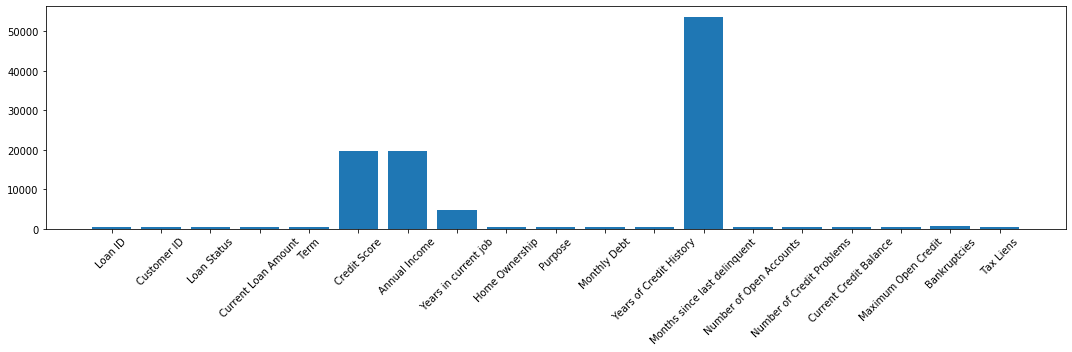

In [8]:
# Graphing missing values
fig, ax = plt.subplots(figsize=(15, 5))

x = bank_df.isna().sum().index
y = bank_df.isna().sum()
ax.bar(x=x, height=y)
ax.set_xticklabels(x, rotation = 45)
plt.tight_layout();

In [9]:
# Number of unique values in each columns
bank_df.nunique(axis=0)

Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
dtype: int64

In [10]:
bank_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))).T  # Supressing scientific notation

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.000000,11760447.389460,31783942.546075,10802.000000,179652.000000,312246.000000,524942.000000,99999999.000000
Credit Score,80846.000000,1076.456089,1475.403791,585.000000,705.000000,724.000000,741.000000,7510.000000
Annual Income,80846.000000,1378276.559842,1081360.195662,76627.000000,848844.000000,1174162.000000,1650663.000000,165557393.000000
Monthly Debt,100000.000000,18472.412336,12174.992609,0.000000,10214.162500,16220.300000,24012.057500,435843.280000
Years of Credit History,100000.000000,18.199141,7.015324,3.600000,13.500000,16.900000,21.700000,70.500000
Months since last delinquent,46859.000000,34.901321,21.997829,0.000000,16.000000,32.000000,51.000000,176.000000
Number of Open Accounts,100000.000000,11.128530,5.009870,0.000000,8.000000,10.000000,14.000000,76.000000
Number of Credit Problems,100000.000000,0.168310,0.482705,0.000000,0.000000,0.000000,0.000000,15.000000
Current Credit Balance,100000.000000,294637.382350,376170.934666,0.000000,112670.000000,209817.000000,367958.750000,32878968.000000
Maximum Open Credit,99998.000000,760798.381748,8384503.472368,0.000000,273438.000000,467874.000000,782958.000000,1539737892.000000


### Conclusion

When performing the .describe() function there are many outliers that are shown throughout many of the columns

## Looking at categorical variables

In [11]:
# Separating categorical from numeric variables
cat_variables = bank_df.select_dtypes(include="object")
cat_variables.drop(columns=["Loan ID", "Customer ID"], inplace=True)  # Dropping redundant columns

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
cat_variables.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
1,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation
4,Fully Paid,Short Term,5 years,Rent,Debt Consolidation


In [13]:
# Dependent variable values
cat_variables["Loan Status"].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [14]:
# Dependent variable normalization
cat_variables["Loan Status"].value_counts(normalize=True)

Fully Paid     0.77361
Charged Off    0.22639
Name: Loan Status, dtype: float64

### Conlusion: Dependent Variable

The dependent variable is unblanced

In [15]:
cat_variables["Term"].unique()

array(['Short Term', 'Long Term', nan], dtype=object)

In [16]:
cat_variables["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage', nan],
      dtype=object)

In [17]:
cat_variables["Purpose"].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy', nan],
      dtype=object)

In [18]:
cat_variables["Years in current job"].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

# Graphical Univariate Analysis

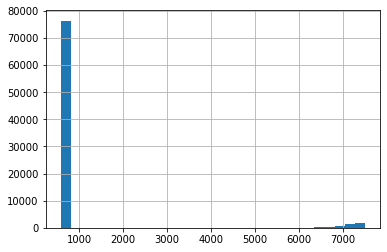

In [19]:
# Checking credit score
bank_df["Credit Score"].hist(bins=30)

In [20]:
# Rows with a credit score greater than 850, U.S. highest credit score.
bank_df.loc[bank_df["Credit Score"] > 850]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,NaN,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,NaN,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,NaN,5.0,0.0,474658.0,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99851,5eee6c31-62d4-400c-a81f-37bd373db926,039ee8d2-3321-4683-9592-cb1a360c34e2,Charged Off,198572.0,Short Term,7420.0,526205.0,2 years,Rent,Debt Consolidation,9910.02,16.5,NaN,8.0,0.0,296704.0,433224.0,0.0,0.0
99872,ce1f8220-7eba-4ec1-8bef-ca28f4916801,3e108ac9-9b7c-44a9-9289-e389cf3085b1,Charged Off,110924.0,Short Term,7070.0,804631.0,4 years,Rent,Debt Consolidation,11533.00,13.3,61.0,9.0,0.0,60154.0,96470.0,0.0,0.0
99906,096471bd-820e-4d0e-88a7-d699a59ab87a,4cfda7f6-790e-4493-a9b1-4d35a8b63af9,Charged Off,175362.0,Short Term,6880.0,1060162.0,9 years,Rent,Debt Consolidation,16079.13,17.3,NaN,13.0,0.0,277153.0,333234.0,0.0,0.0
99944,36da0533-8664-4156-8e96-f0d07966acdb,070e3aa9-d077-404c-8946-59ce976e0b70,Charged Off,88968.0,Short Term,6790.0,441845.0,< 1 year,Rent,other,5375.86,8.5,NaN,10.0,0.0,193306.0,535458.0,0.0,0.0


### Credit Score Conclusion

**Problem**: Shows that there are a lot of outliers. The credit scores that are greater than 850, add on another 0 at the end. 

**Solution**: Instead of getting rid of the rows, we could remove the 0's

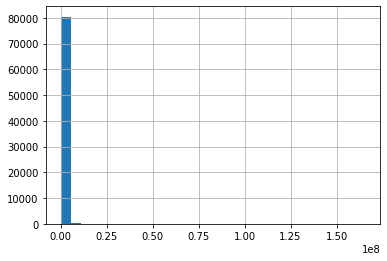

In [21]:
# Looking into Annual Income
bank_df["Annual Income"].hist(bins=30)

### Count Plot for Categorical Data

In [22]:
cat_variables.columns

Index(['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose'],
      dtype='object')

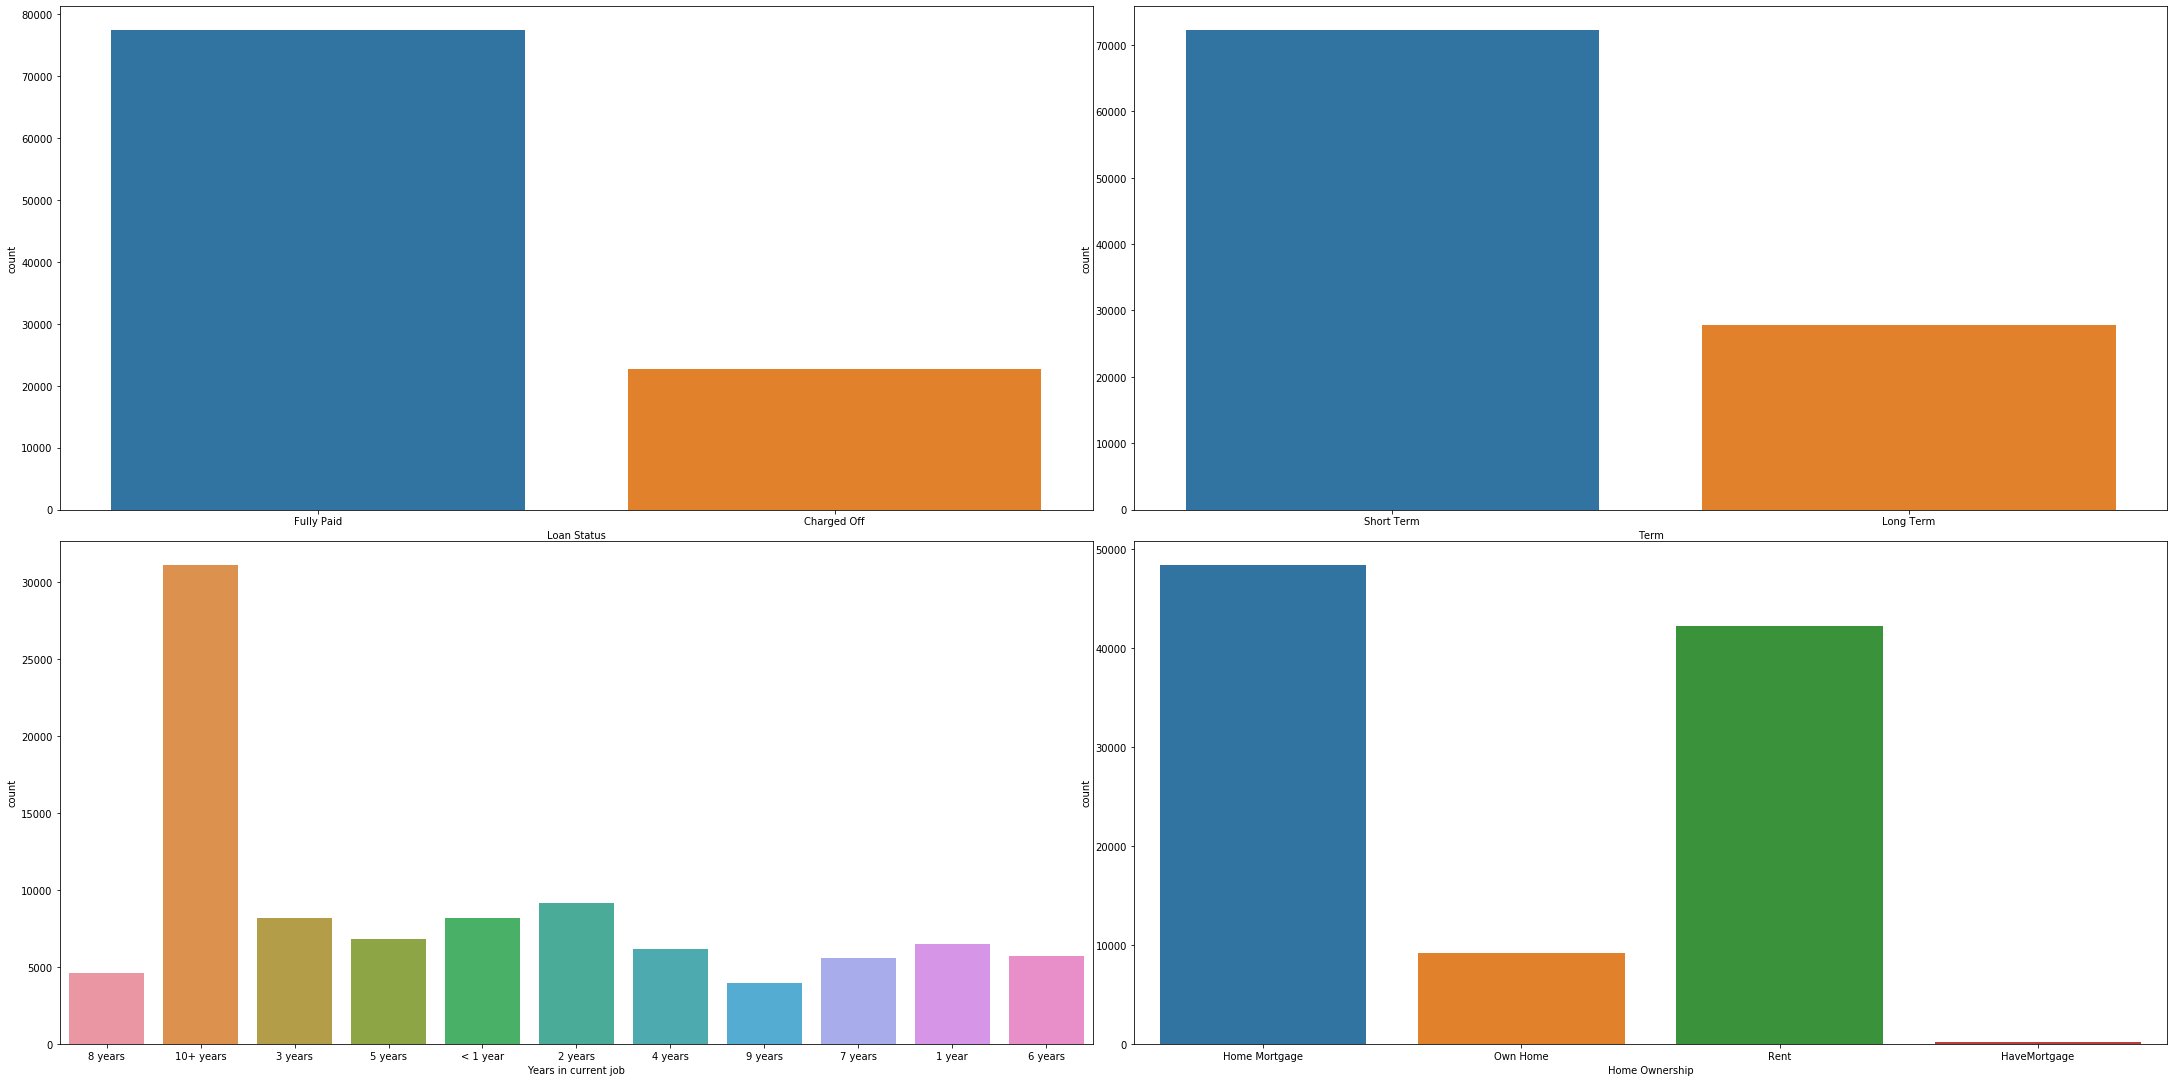

In [23]:
fig, ax =plt.subplots(2, 2)

# Setting height and width of subplots
fig.set_figheight(15)
fig.set_figwidth(30)

# Adding spacing between boxes
fig.tight_layout(h_pad=True, w_pad=True)

# Count plots of chosen columns
sns.countplot(bank_df["Loan Status"], ax=ax[0, 0])
sns.countplot(bank_df["Term"], ax=ax[0,1])
sns.countplot(bank_df["Years in current job"], ax=ax[1, 0])
sns.countplot(bank_df["Home Ownership"], ax=ax[1, 1])

# Showing graphs
plt.show()

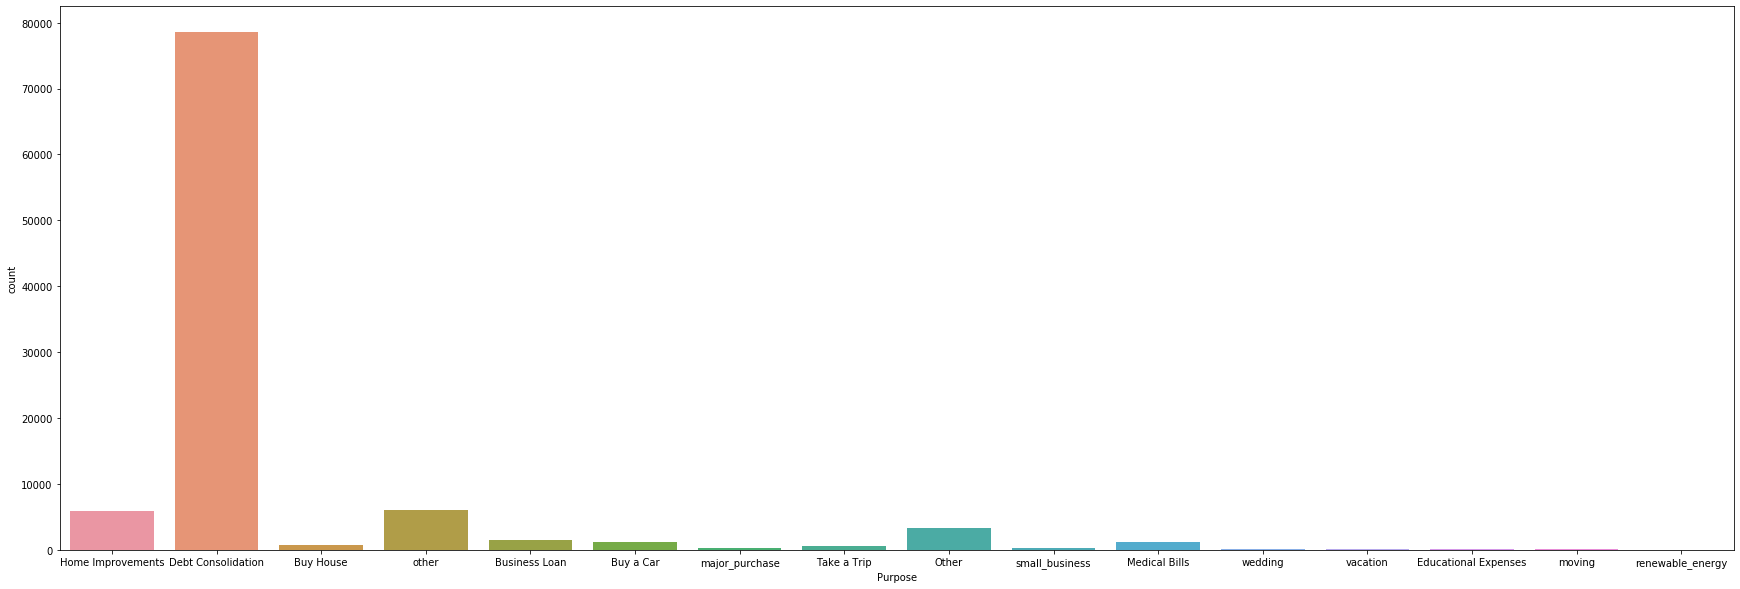

In [24]:
# Count plot for Purpose column
plt.figure(figsize=(30, 10))  # Size of graph
sns.countplot(bank_df["Purpose"])  # Count plot of chosen column

# Showing graph
plt.show()

## Outliers

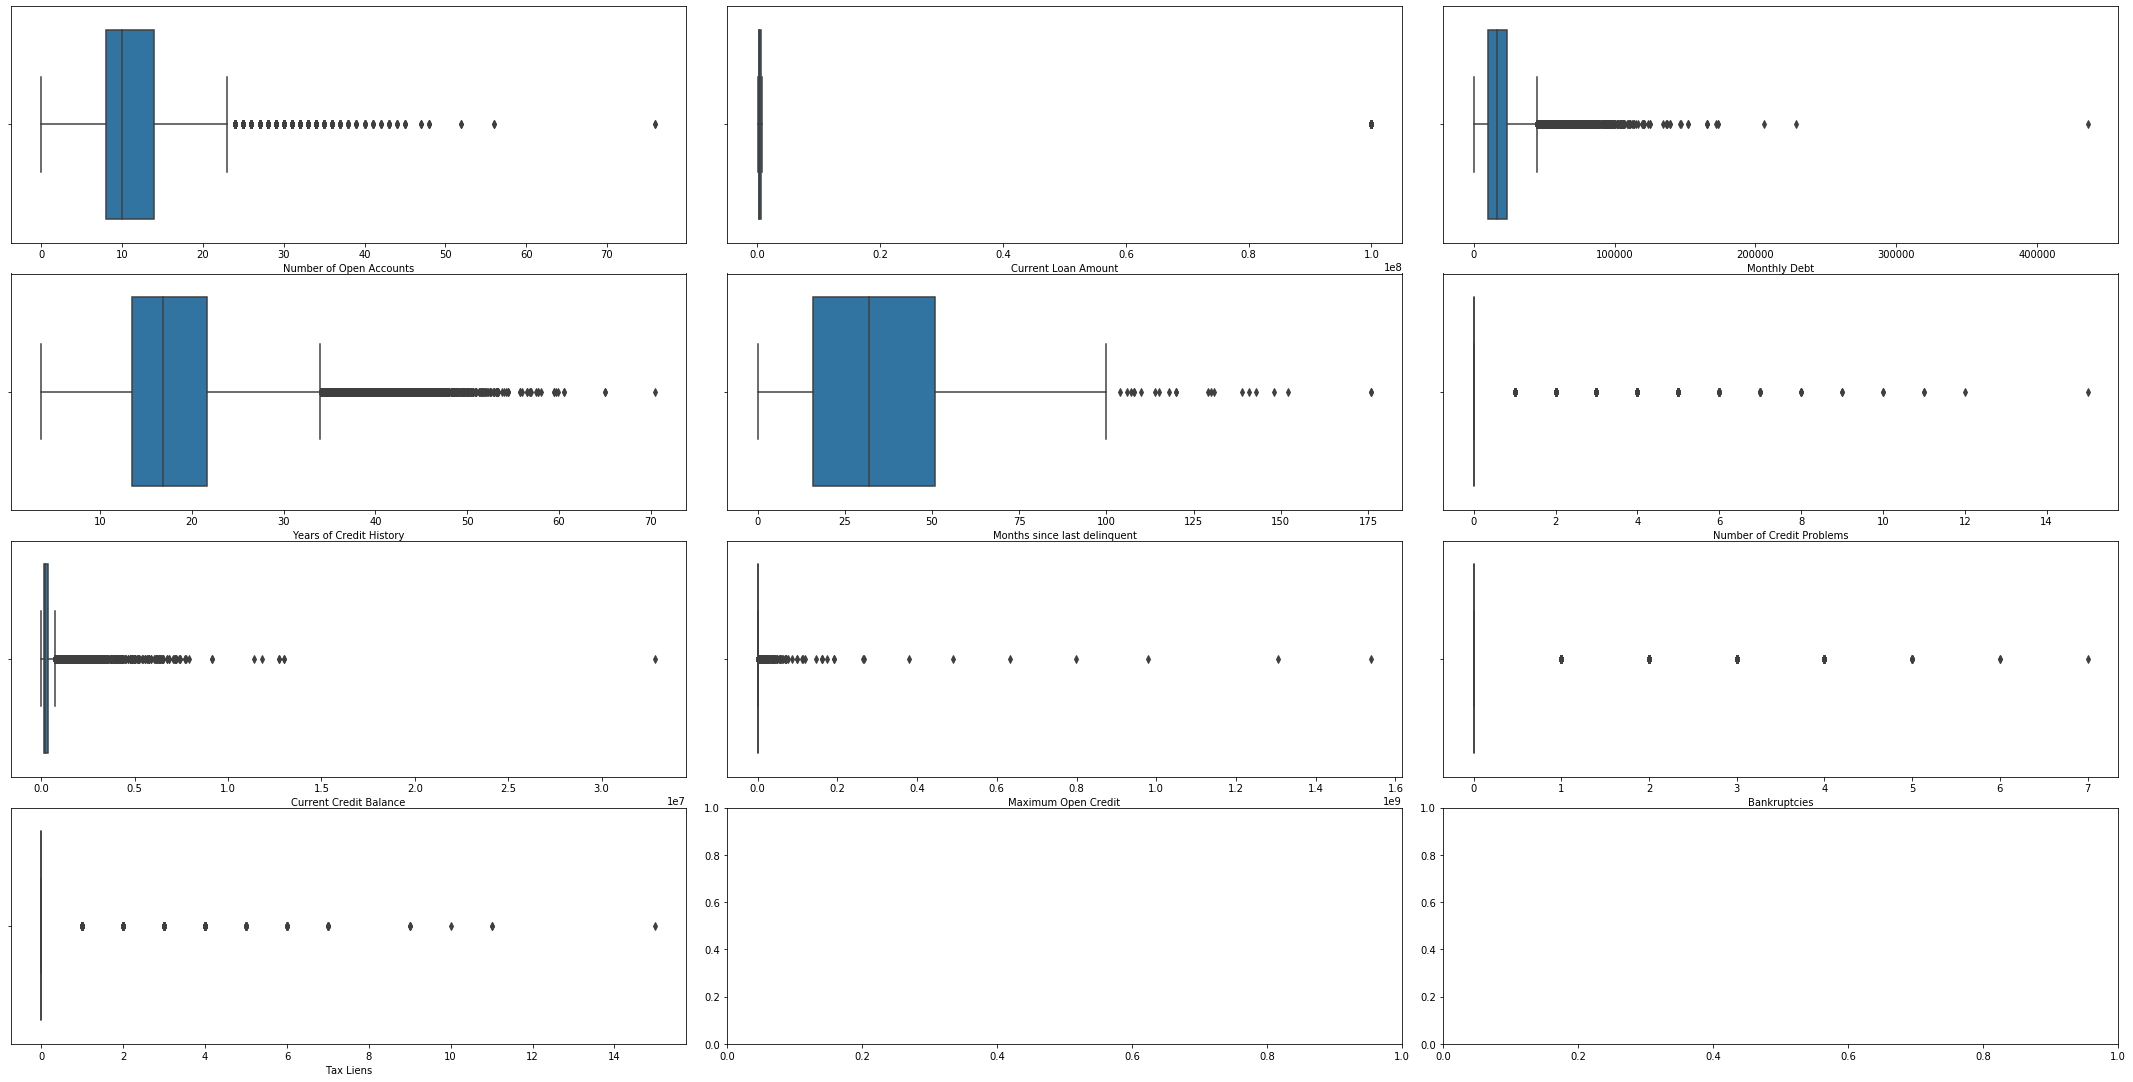

In [25]:
fig, ax = plt.subplots(4, 3)

# Setting height and width of subplots
fig.set_figheight(15)
fig.set_figwidth(30)

# Adding spacing between boxes
fig.tight_layout(h_pad=True, w_pad=True)

sns.boxplot(bank_df["Number of Open Accounts"], ax=ax[0, 0])
sns.boxplot(bank_df["Current Loan Amount"], ax=ax[0, 1])
sns.boxplot(bank_df["Monthly Debt"], ax=ax[0, 2])
sns.boxplot(bank_df["Years of Credit History"], ax=ax[1, 0])
sns.boxplot(bank_df["Months since last delinquent"], ax=ax[1, 1])
sns.boxplot(bank_df["Number of Credit Problems"], ax=ax[1, 2])
sns.boxplot(bank_df["Current Credit Balance"], ax=ax[2, 0])
sns.boxplot(bank_df["Maximum Open Credit"], ax=ax[2, 1])
sns.boxplot(bank_df["Bankruptcies"], ax=ax[2, 2])
sns.boxplot(bank_df["Tax Liens"], ax=ax[3, 0])

plt.show()

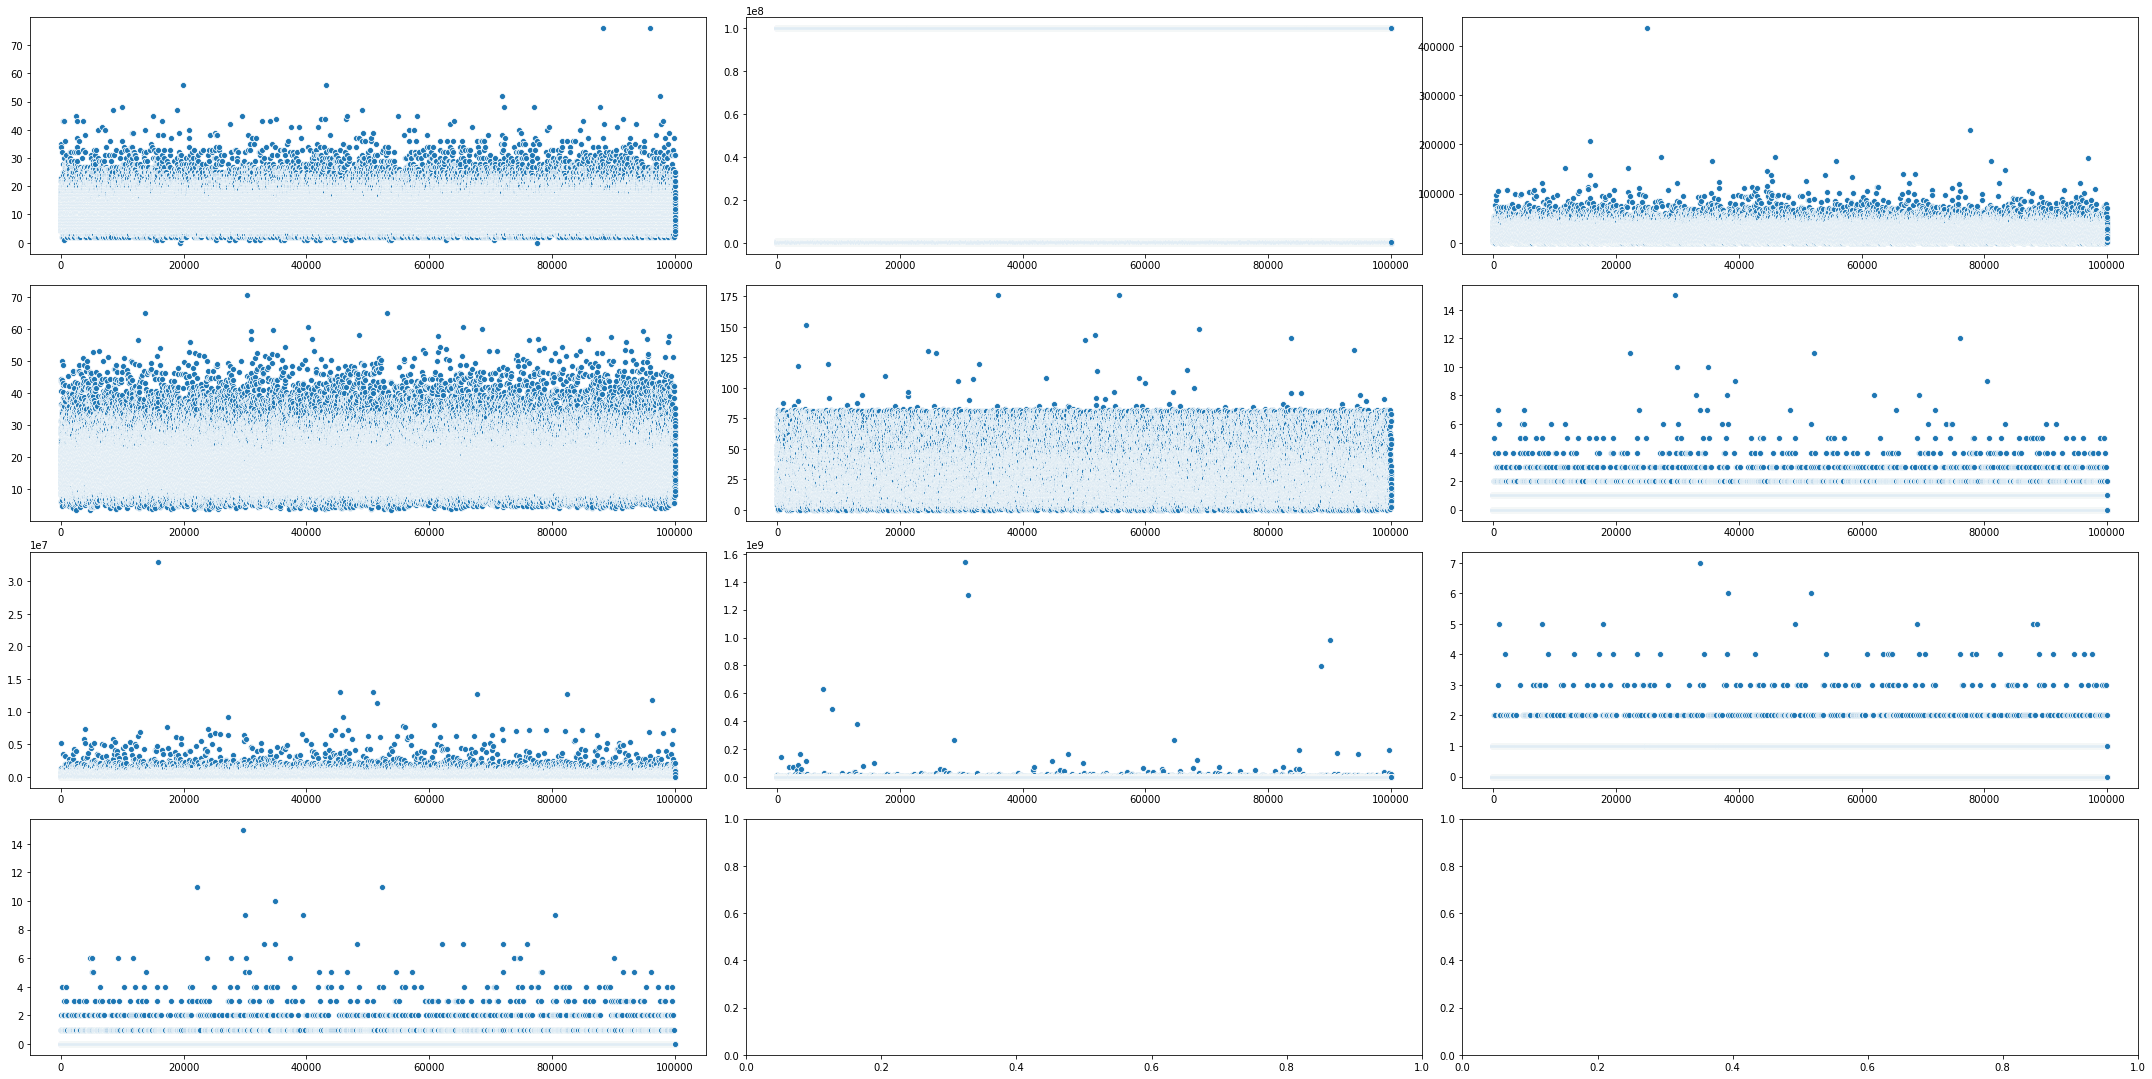

In [26]:
fig, ax = plt.subplots(4, 3)

# Setting height and width of subplots
fig.set_figheight(15)
fig.set_figwidth(30)

# Adding spacing between boxes
fig.tight_layout(h_pad=True, w_pad=True)


sns.scatterplot(data=bank_df["Number of Open Accounts"], ax=ax[0, 0])
sns.scatterplot(data=bank_df["Current Loan Amount"], ax=ax[0, 1])
sns.scatterplot(data=bank_df["Monthly Debt"], ax=ax[0, 2])
sns.scatterplot(data=bank_df["Years of Credit History"], ax=ax[1, 0])
sns.scatterplot(data=bank_df["Months since last delinquent"], ax=ax[1, 1])
sns.scatterplot(data=bank_df["Number of Credit Problems"], ax=ax[1, 2])
sns.scatterplot(data=bank_df["Current Credit Balance"], ax=ax[2, 0])
sns.scatterplot(data=bank_df["Maximum Open Credit"], ax=ax[2, 1])
sns.scatterplot(data=bank_df["Bankruptcies"], ax=ax[2, 2])
sns.scatterplot(data=bank_df["Tax Liens"], ax=ax[3, 0])

plt.show()

In [27]:
# Categorical Ordinal
bank_df["Tax Liens"].unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

In [28]:
# Categorical Ordinal
bank_df["Bankruptcies"].unique()

array([ 1.,  0.,  2.,  3., nan,  5.,  4.,  7.,  6.])

### Outlier Conlusion:

Number of Credit Card Problems, Bankrupties, and Tax Liens are all categorical ordinal values

# Cleaning Data

### Steps:
1. Remove Loan ID and Customer ID columns
2. Remove Years of Credit History column
3. Treat outliers
4. Convert categorical variables to numeric using get dummies
    - Why get dummies instead of One Hot Encoder: I use get dummies isntead of ohe because ohe will not ignore NaN values
5. Impute missing values
6. Drop duplicated data

**Step1**

In [29]:
# Removing Loan ID and Customer ID columns and Years of Credit History
bank_df.drop(columns=["Loan ID", "Customer ID", "Years of Credit History"], inplace=True)

**Step2**

In [30]:
# Replacing Credit Score column to strings
bank_df["Credit Score"] = bank_df["Credit Score"].astype("str")

In [31]:
# Removing periods and 0s from the Credit Score column
bank_df["Credit Score"] = [nums.replace("0", "") for nums in bank_df["Credit Score"]]
bank_df["Credit Score"] = [nums.replace(".", "") for nums in bank_df["Credit Score"]]

In [32]:
# Converting Credit Score column from a str to a float
bank_df["Credit Score"] = bank_df["Credit Score"].astype("float64")

In [33]:
bank_df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,79.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


**Step3**

In [34]:
# Creating max and min cap locks to remove outliers
def max_cap_lock(df, column:str, cap:int):
    index = df[column].loc[df[column] >= cap].index
    df.drop(index=index, inplace=True)
    
def min_cap_lock(df, column:str, cap:int):
    index = df[column].loc[df[column] <= cap].index
    df.drop(index=index, inplace=True)

In [36]:
# Current Loan Amount
max_cap_lock(bank_df, "Current Loan Amount", 1_000_000)
max_cap_lock(bank_df, "Number of Open Accounts", 35)
max_cap_lock(bank_df, "Monthly Debt", 150_000)
max_cap_lock(bank_df, "Months since last delinquent", 80)
max_cap_lock(bank_df, "Number of Credit Problems", 6)
max_cap_lock(bank_df, "Bankruptcies", 5)
max_cap_lock(bank_df, "Tax Liens", 5)

**Step4 - 6**

In [37]:
# Using get dummies to convert categorical values to numeric
cat_to_num = pd.get_dummies(cat_variables, drop_first=True)  # Performing get dummies on categorical values

In [38]:
cat_to_num.head()

,Loan Status_Fully Paid,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### SimpleImputer

Imputing missing values

In [39]:
# Numeric data
num_var = bank_df.select_dtypes(exclude="object")

In [40]:
# Using SimpleImputer with a mean strategy to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [41]:
impute_num = imputer.fit_transform(num_var)  # Imputing missing values for numeric data
impute_cat = imputer.fit_transform(cat_to_num)  # Imputing missing values for encoded data
impute_num_df = pd.DataFrame(impute_num, columns=num_var.columns)  # Changing the array into a dataframe for numeric
impute_cat_df = pd.DataFrame(impute_cat, columns=cat_to_num.columns)  # Converting array to a dataframe for cat_to_num (encoded values)

In [42]:
# Combining dataframes
bank_df = impute_num_df.join(impute_cat_df, how="left")

In [43]:
# Checking if there are any duplicated data
bank_df.duplicated().sum()

507

In [44]:
# Dropping duplicated data
bank_df.drop_duplicates(inplace=True)

In [45]:
bank_df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,79.0,1167493.0,5214.74,13.0,6.0,1.0,228190.0,416746.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,347666.0,721.0,806949.0,8741.90,13.0,9.0,0.0,256329.0,386958.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,176220.0,74.0,973370.0,20639.70,13.0,15.0,0.0,253460.0,427174.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,206602.0,729.0,896857.0,16367.74,13.0,6.0,0.0,215308.0,272448.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,217646.0,73.0,1184194.0,10855.08,10.0,13.0,1.0,122170.0,272052.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
display(bank_df.shape)
display(bank_df.columns)

(87633, 41)

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_

# Multivariate Analysis

In [ ]:
# Looking at the distribution of the data
sns.pairplot(bank_df)

### Data Distribution Conclusion:

Majority of the data seems to be categorical ordinal

# Correlation Analysis

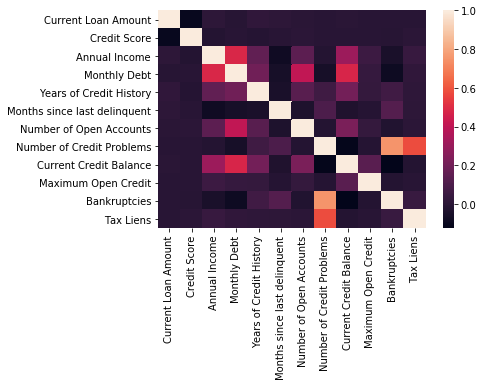

In [17]:
# Looking at mulitcollinearity
sns.heatmap(bank_df.corr())